In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")

In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


Text(0, 0.5, 'Sales')

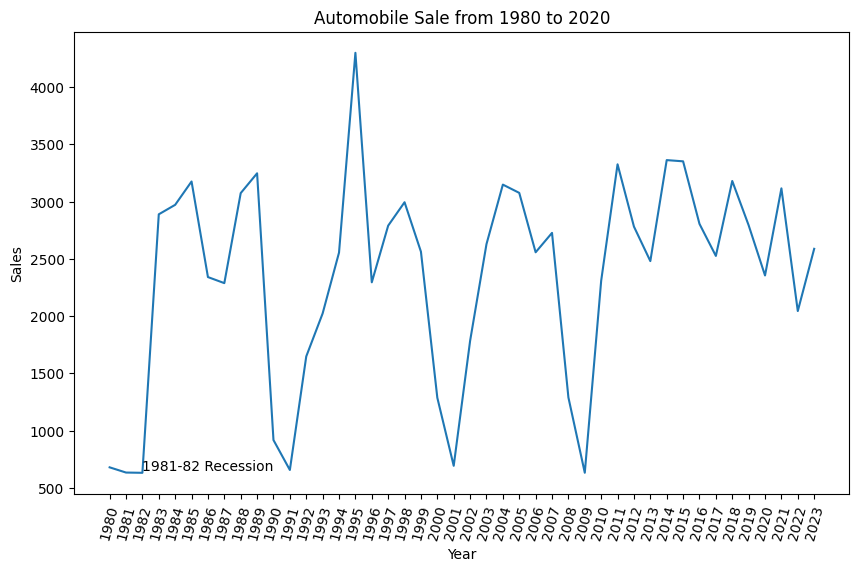

In [ ]:
plt.figure(figsize=(10, 6))
line_chart = df.groupby("Year")["Automobile_Sales"].mean()
line_chart.plot(kind="line")
plt.title("Automobile Sale from 1980 to 2020")
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.text(1982, 650, '1981-82 Recession')
plt.xlabel("Year")
plt.ylabel("Sales")

Text(0.5, 1.0, 'Sales Trend Vehicle-wise during Recession')

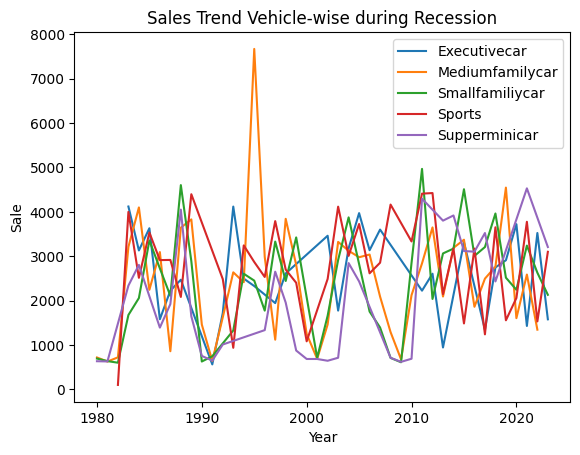

In [ ]:
vehicle = df.groupby(["Year","Vehicle_Type"],as_index=False)["Automobile_Sales"].mean()
vehicle.set_index("Year",inplace=True)
vehicle = vehicle.groupby(["Vehicle_Type"])["Automobile_Sales"]
vehicle.plot(kind="line")
plt.legend()
plt.xlabel('Year')
plt.ylabel('Sale')
plt.title('Sales Trend Vehicle-wise during Recession')


Text(0.5, 1.0, 'Sales during recession and non recesssion')

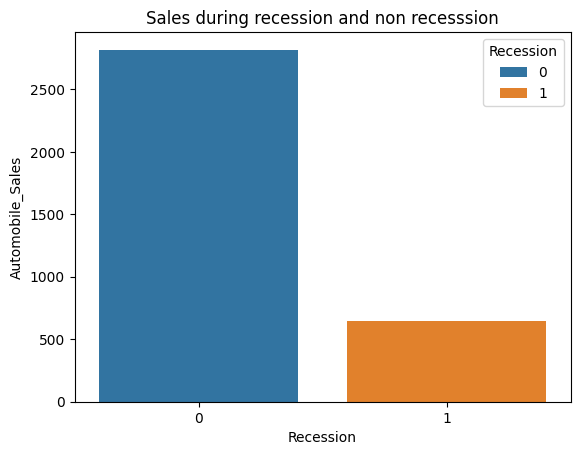

In [ ]:
rec = df.groupby("Recession")["Automobile_Sales"].mean().reset_index()
sns.barplot(x="Recession",y="Automobile_Sales",hue="Recession",data=rec)
plt.title("Sales during recession and non recesssion")

In [ ]:
Rperiod = df[df["Recession"]==1]
nRperiod = df[df["Recession"]==0]

Text(0.5, 1.0, 'GDP Variation during Non-Recession period')

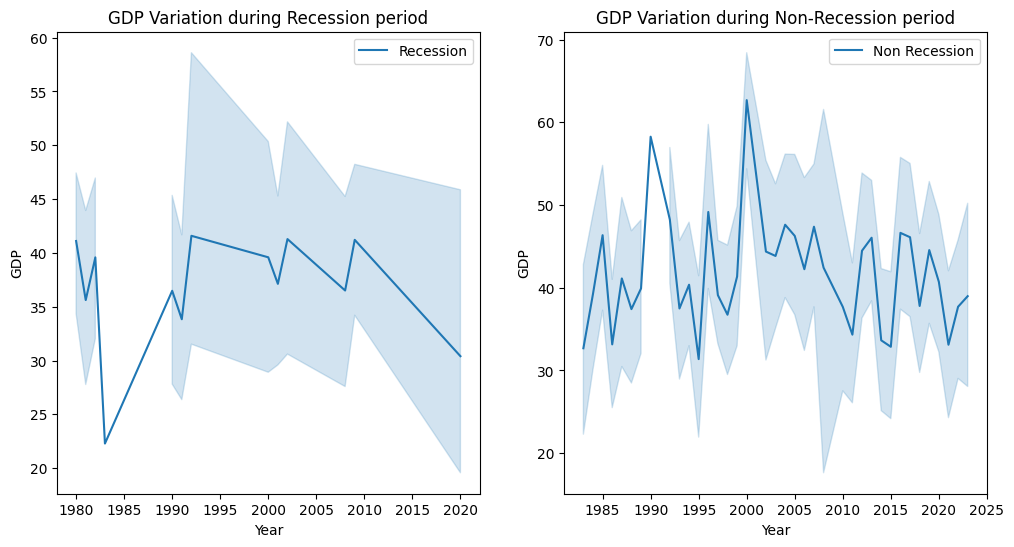

In [ ]:
fig = plt.figure(figsize=(12,6))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

sns.lineplot(x="Year",y="GDP",data=Rperiod,ax=ax0,label="Recession")
ax0.set_title("GDP Variation during Recession period")
sns.lineplot(x="Year",y="GDP",data=nRperiod,ax=ax1,label="Non Recession")
ax1.set_title("GDP Variation during Non-Recession period")


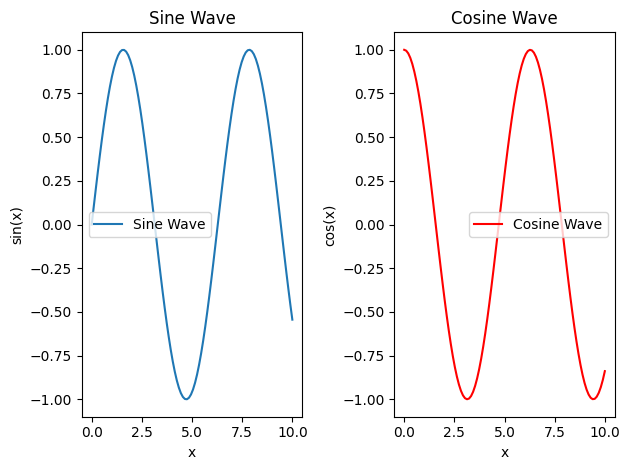

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
fig = plt.figure()

# Add two subplots: 1 row, 2 columns, first subplot
ax0 = fig.add_subplot(121)

# Add second subplot: 1 row, 2 columns, second subplot
ax1 = fig.add_subplot(122)

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Plot data on the first subplot
ax0.plot(x, y1, label='Sine Wave')
ax0.set_title('Sine Wave')
ax0.set_xlabel('x')
ax0.set_ylabel('sin(x)')
ax0.legend()

# Plot data on the second subplot
ax1.plot(x, y2, label='Cosine Wave', color='r')
ax1.set_title('Cosine Wave')
ax1.set_xlabel('x')
ax1.set_ylabel('cos(x)')
ax1.legend()

# Show the figure with both subplots
plt.tight_layout()
plt.show()


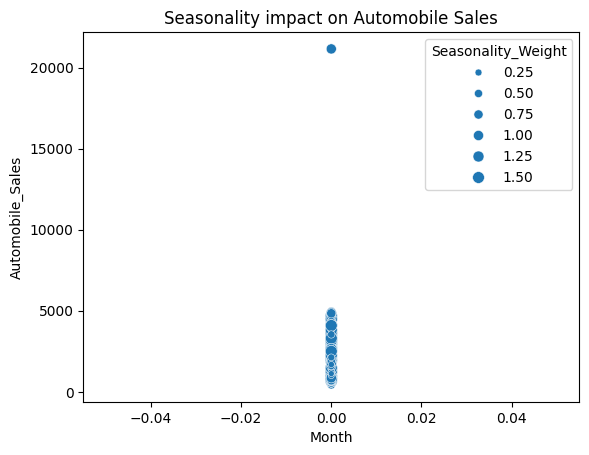

In [ ]:
    non_rec_data = df[df['Recession'] == 0]

    size=non_rec_data['Seasonality_Weight'] #for bubble effect

    sns.scatterplot(data=non_rec_data, x="Recession", y='Automobile_Sales', size=size)

    #you can further include hue='Seasonality_Weight', legend=False)

    plt.xlabel('Month')
    plt.ylabel('Automobile_Sales')
    plt.title('Seasonality impact on Automobile Sales')

    plt.show()

Text(0.5, 1.0, 'Consumer Confidence and Automobile Sales during Recessions')

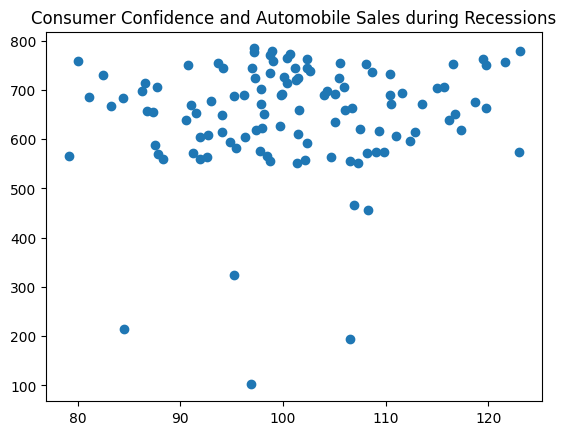

In [ ]:
rec4 = df[df['Recession'] == 1]
plt.scatter(x='Consumer_Confidence', y='Automobile_Sales',data=rec4)
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.


Text(0.5, 1.0, "'Relationship between Average Vehicle Price and Sales during Recessions'")

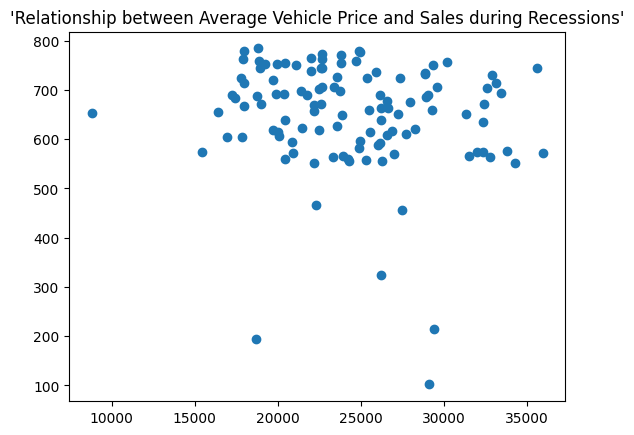

In [ ]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.title("'Relationship between Average Vehicle Price and Sales during Recessions'")


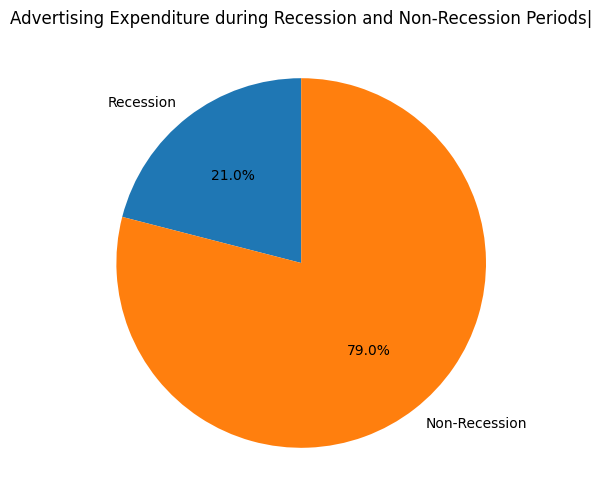

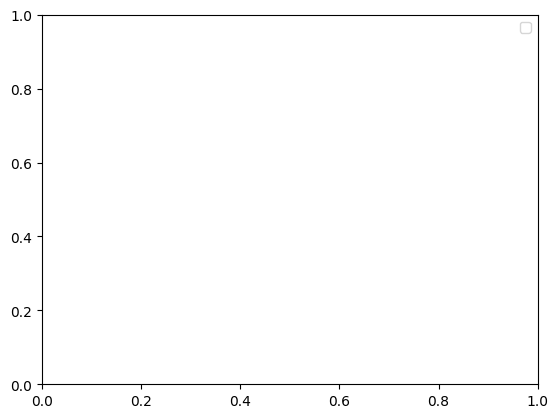

In [ ]:
    # Filter the data
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['Advertising_Expenditure'].sum()
    NRtotal = NRdata['Advertising_Expenditure'].sum()

    # Create a pie chart for the advertising expenditure
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('Advertising Expenditure during Recession and Non-Recession Periods|')

    plt.show()
    plt.legend()

([<matplotlib.patches.Wedge at 0x7fc0a4e5a470>,
 [Text(-0.03296556623628866, 1.0995059215132592, 'Executivecar'),
  Text(-1.0496673092629625, 0.328935464589412, 'Mediumfamilycar'),
  Text(0.30656904861383316, -1.056416309241773, 'Smallfamiliycar'),
  Text(1.072894415422793, -0.2426882225296143, 'Sports'),
  Text(0.8180395519196797, 0.7353987295984742, 'Supperminicar')],
 [Text(-0.017981217947066537, 0.5997305026435958, '1.0%'),
  Text(-0.572545805052525, 0.17941934432149742, '38.4%'),
  Text(0.16721948106209078, -0.5762270777682398, '30.2%'),
  Text(0.5852151356851597, -0.13237539410706234, '3.7%'),
  Text(0.44620339195618886, 0.4011265797809859, '26.7%')])

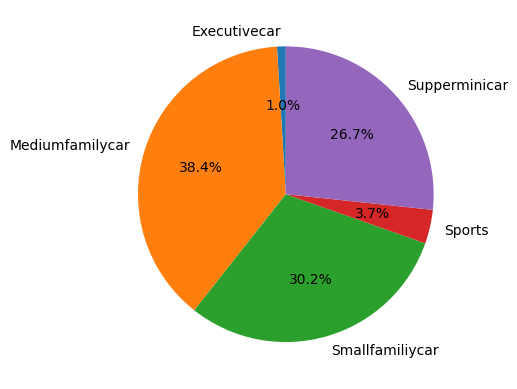

In [ ]:
newRs = df[df["Recession"]==1]
grp = newRs.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
labels = grp.index
sizes = grp.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


In [ ]:
newRs = df[df["Recession"]==1]
newRs

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


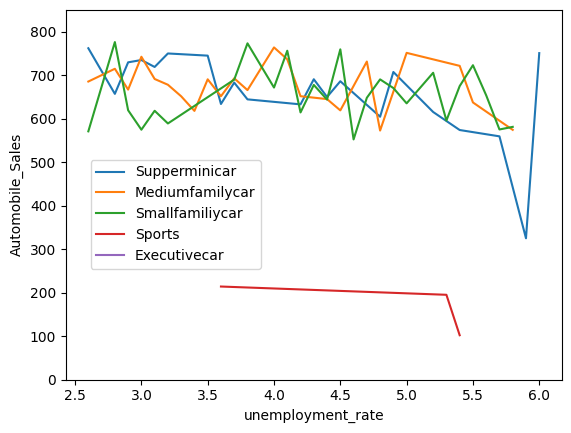

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))